# Finding outlier in dataset

If some datas in a feature doesnt map into the cluster. rather forming small data points in the map

i.e if the x,y values are a series of cluster and suddenly few of the values are not falling in to the cluster then it is called outliers

It is mainly because of human error in data or the value is higher(eg: credit card bills for some people will be higher based on thier spending). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Z- Score

consider a data set having values [1,2,3,4,5] with mean = 3 and std deviation = 1

if you need to convert the distribution to SND. where mean = 0 STD deviation = 1

z = (x-mean/SD)

Z score says in what SD the dataset falls in

if Z<= 3 the data set does not contain outlier.


# Interquartile range

we take the data set falles between 25 percentile and 75 percentile and the finding the difference of data in 25 and 75 percentile gives Interquartile range IQR.

Steps
find the percentile of the data set in 25 and 75 percentile.which is q1,q3

subtract the data to find the IQR = q2 = (q3-q1)

Then find the inner bound and outer bound.

use formula innerbound = q1-(1.5*IQR)
             Outerbound = q3-(1.5*IQR)

the values falling outside the inner and outer bound are outliers.



# Reason for Outlier in a data set?

1.Varilability in dataset

2.An exprimental measurement error

# Impacts of having a Outliers?

It causes various problem to statistical analysys

Causes huge impact on mean and standard deviation

In [4]:
dataset= [1,2,3,4,5,66,77,55,44,22,88,11,23,7,42,668,4,22,694,5,38,92,44,77,32,65,41,42,48,56,79,3,35,95,97,65]

# Z-Score

In [7]:
out =  []
t = 3
def chekker(data):
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z = (i-mean)/std
        if np.abs(z)>3:
            out.append(i)
    return out

In [8]:
data1 = chekker(dataset)

In [9]:
data1

[668, 694]

# IQR

In [11]:
q1, q3 = np.percentile(dataset,[25,75])

In [13]:
q1,q3

(10.0, 68.75)

In [19]:
IQR = q3-q1
IQR

58.75

In [20]:
IB = q1 - (1.5*IQR)
OB = q3 + (1.5*IQR)

In [21]:
IB,OB

(-78.125, 156.875)

# Normallisation vs. Standardisation

In this approch we will try to scale down the values of the feature between 0 to 1

Xnorm = (X-Xmin)/(Xmax - Xmin)

In [3]:
import pandas as pd

In [13]:
df= pd.read_csv("wine (1).data",header=None,usecols=[0,1,2])
df.columns= ['Class', 'Alcohol', 'Malic']
df.head()

,Class,Alcohol,Malic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [14]:
from sklearn.preprocessing import MinMaxScaler
scle = MinMaxScaler()

In [15]:
scle.fit_transform(df[['Malic','Alcohol']])

array([[0.1916996 , 0.84210526],
       [0.2055336 , 0.57105263],
       [0.3201581 , 0.56052632],
       [0.23913043, 0.87894737],
       [0.36561265, 0.58157895],
       [0.20158103, 0.83421053],
       [0.22332016, 0.88421053],
       [0.27865613, 0.79736842],
       [0.17786561, 1.        ],
       [0.12055336, 0.74473684],
       [0.28063241, 0.80789474],
       [0.14624506, 0.81315789],
       [0.19565217, 0.71578947],
       [0.19565217, 0.97894737],
       [0.22332016, 0.88157895],
       [0.21146245, 0.68421053],
       [0.23320158, 0.86052632],
       [0.16403162, 0.73684211],
       [0.16798419, 0.83157895],
       [0.46640316, 0.68684211],
       [0.17588933, 0.79736842],
       [0.60474308, 0.5       ],
       [0.22134387, 0.70526316],
       [0.16996047, 0.47894737],
       [0.21146245, 0.65      ],
       [0.25889328, 0.53157895],
       [0.20355731, 0.62105263],
       [0.19367589, 0.59736842],
       [0.22924901, 0.74736842],
       [0.18577075, 0.78684211],
       [0.

#### Univariant, Bivarient, multi varient

In [57]:
df= pd.read_csv('iris.data',header=None)
df.columns= ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
df.shape

(150, 5)

In [60]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [61]:
df_setosa = df.loc[df['class']== 'Iris-setosa']

In [62]:
df_versicolor = df.loc[df['class']== 'Iris-versicolor']

In [63]:
df_virginica = df.loc[df['class']== 'Iris-virginica']

In [64]:
import matplotlib.pyplot as plt
import numpy as np

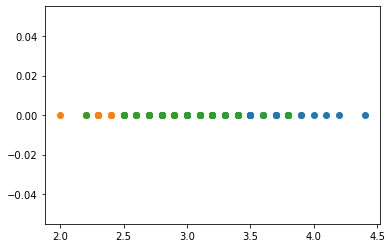

In [65]:
plt.plot(df_setosa['sepal_width'],np.zeros_like(df_setosa['sepal_width']),'o')
plt.plot(df_versicolor['sepal_width'],np.zeros_like(df_versicolor['sepal_width']),'o')
plt.plot(df_virginica['sepal_width'],np.zeros_like(df_virginica['sepal_width']),'o')

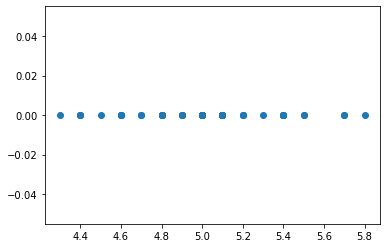

In [66]:
plt.plot(df_setosa['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')

In [67]:
#### Bivarient Analysis

In [68]:
import seaborn as sns


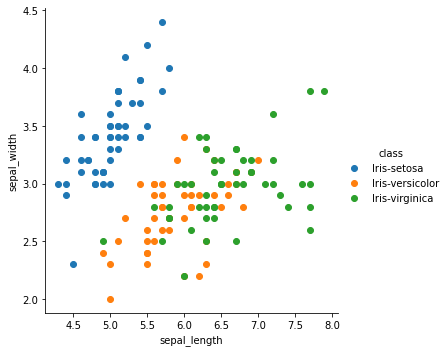

In [70]:
sns.FacetGrid(df,hue='class',size=5).map(plt.scatter,'sepal_length','sepal_width').add_legend()

In [71]:
#mulltivariant analysis

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


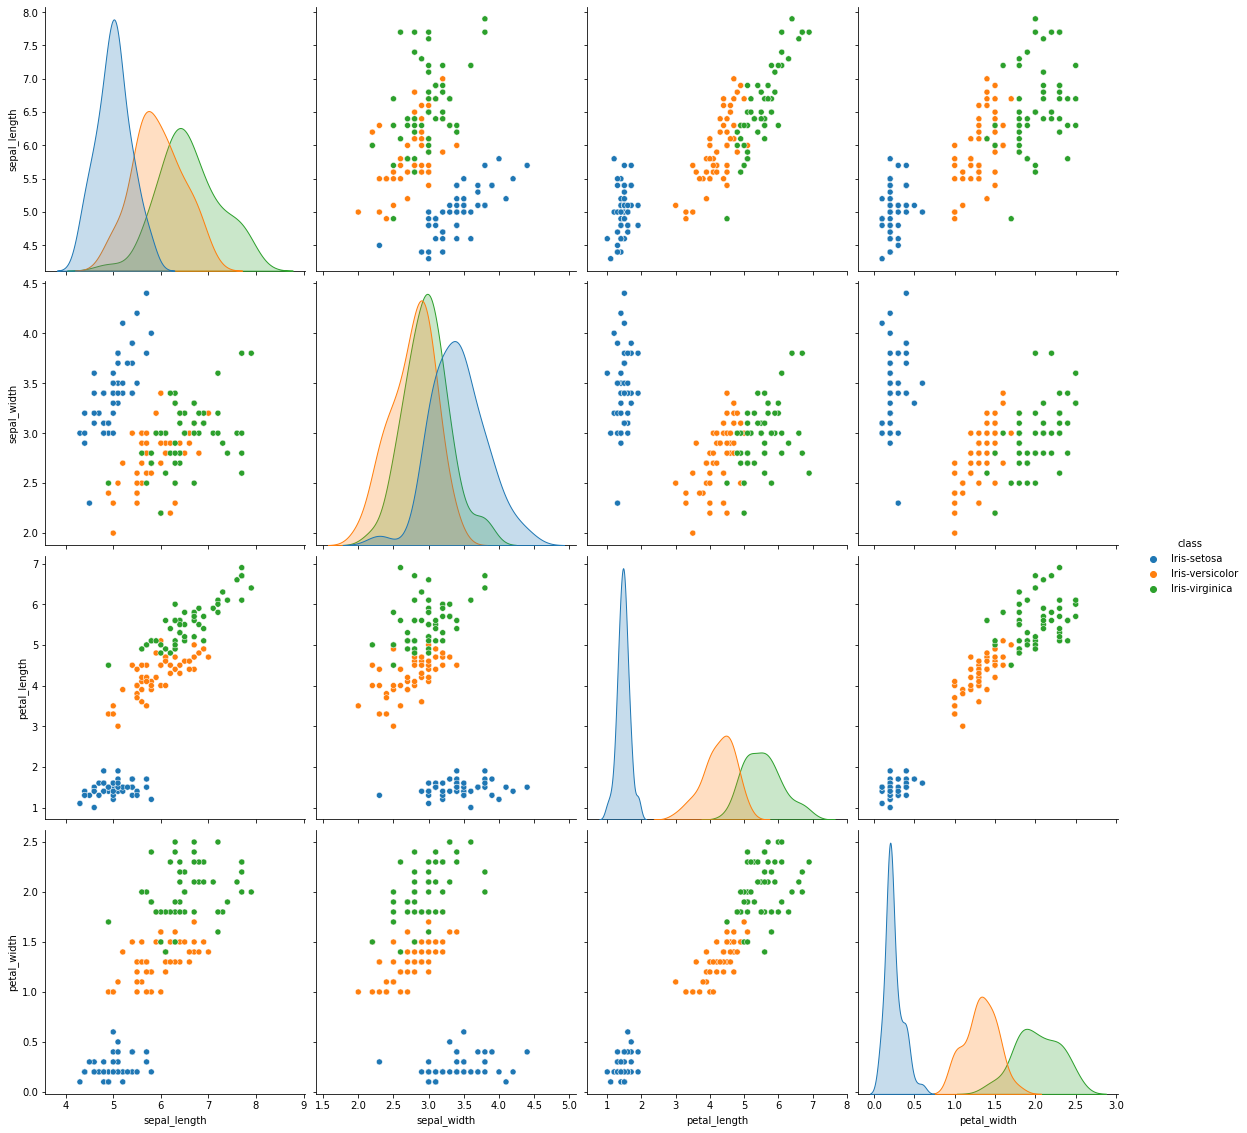

In [76]:
sns.pairplot(df,hue='class',size=4)